In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import wrangle

Exercises
Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

1. Load your zillow dataset.

2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calfulatedfinishedsqft.

3. Plot the residuals for the linear regression model that you made.

4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

7. What is the amount of variance explained in your model?

8. Is your model better than the baseline model?

9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips
0,4,2.0,3633,296425,2005,6941.39,6037
1,3,4.0,1620,847770,2011,10244.94,6037
2,3,2.0,2077,646760,1926,7924.68,6037
3,0,0.0,1200,5328,1972,91.60,6037
4,0,0.0,171,6920,1973,255.17,6037


In [7]:
train, validate, test = wrangle.train_validate_test(df)

train shape:  (1508099, 7) , validate shape:  (377025, 7) , test shape:  (209459, 7)

train percent:  72.0 , validate percent:  18.0 , test percent:  10.0


In [9]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(train[['area']], train.tax_value)

# make prediction
train['yhat'] = lm.predict(train[['area']])

In [10]:
# make a baseline prediction (mean tax_value)
train['baseline'] = train.tax_value.mean()

In [11]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,yhat,baseline
1054933,4,2.0,1451,560000,1962,6603.37,6037,363055.327137,398646.008504
584421,5,3.0,2604,878869,1970,9833.12,6059,481454.397515,398646.008504
1242400,3,2.0,1412,232923,1950,3408.98,6037,359050.501687,398646.008504
1557109,3,2.0,1520,201628,1967,2670.42,6037,370140.787550,398646.008504
857417,3,2.0,1252,613000,1971,7012.52,6059,342620.448555,398646.008504


<AxesSubplot:xlabel='tax_value', ylabel='area'>

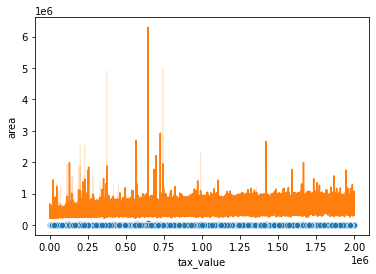

In [12]:
# plot data and prediction line

sns.scatterplot(x = 'tax_value', y = 'area', data = train)
sns.lineplot(x = 'tax_value', y = 'baseline', data = train)
sns.lineplot(x = 'tax_value', y = 'yhat', data = train)

In [13]:
#Plot the residuals for the linear regression model that you made.

train['residual'] = train.area - train.yhat
train['baseline_residual'] = train.area - train.baseline

In [14]:
train.head()

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,yhat,baseline,residual,baseline_residual
1054933,4,2.0,1451,560000,1962,6603.37,6037,363055.327137,398646.008504,-361604.327137,-397195.008504
584421,5,3.0,2604,878869,1970,9833.12,6059,481454.397515,398646.008504,-478850.397515,-396042.008504
1242400,3,2.0,1412,232923,1950,3408.98,6037,359050.501687,398646.008504,-357638.501687,-397234.008504
1557109,3,2.0,1520,201628,1967,2670.42,6037,370140.787550,398646.008504,-368620.787550,-397126.008504
857417,3,2.0,1252,613000,1971,7012.52,6059,342620.448555,398646.008504,-341368.448555,-397394.008504
